# Project: Investigate a Dataset - [Medical Appointment No Show Data Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project, I will be investigating the No Show appointments dataset to investigate the factor responsible for
the attendance rate of patients. This data was collected from data of over 110k patients who had a medical appointment in Brazil. The dataset contains their medical history, appointment schedule and attendance status for the appoinment. The major question I will focus my investigation on is: Which factor(s) amongst the attributes in the dataset makes the patients to miss their medical appointment

### Dataset Description 
> The dataset columns and description are as follows;
  - PatientId: Contains the unique identification for each patients observed.   
  - AppointmentID: Contains the unique identification given to patients to confirm medical appointment.   
  - Gender: This is the patient sexuality categorized as either male of female.
  - ScheduledDay: This is the date that a patients medical appointmnent was booked/scheduled.
  - AppointmentDay: This is the date that patients is meant to visit the hospital to see the Doctor.
  - Age: This is the patients age.
  - Neighbourhood: This is the hospital locality or location area.
  - Scholarship: shows if the patient is enrolled under the Bolsa Família social welfare program (0 is No & 1 is Yes).
  - Hipertension: shows whether patient has hypertension or not(0 is No & 1 is Yes).
  - Diabetes: shows whether patient has Diabetes or not (0 is No & 1 is Yes).
  - Alcoholism: shows whether patient has Alcoholism or not (0 is No & 1 is Yes).
  - Handcap: shows whether patient is a Handicap or not(0 is No & 1 is Yes).
  - SMS_received: shows whether patient has hypertension or not (0 is No & 1 is Yes).
  - No-show: shows whether the patient showed up for the medical appointment or now (Yes means Didn't show up & No means Showed up)


### Question(s) for Analysis
> 1. Does patient gender affects the attendance rate?
     - what is proportion of male attended their appointment.
     - what is proportion of female attended their appointment.
     
> 2. Does patients SMS receipt status affect the attendance rate?
    - what is the proportion patients who received SMS and attended their appointment.
    - what is the proportion of patients who did not received SMS and attended their appointment.

> 3. Does patients Hypertension Status affect the attendance rate?
    - what is the proportion of patients who have hypertension and attended their appointment.
    - what is the proportion of patients who do not have hypertension and attended their appointment.

> 4. Does patients Diabetes Status affect the attendance rate?
    - what is the proportion of patients who have diabetes and attended their appointment.
    - what is the proportion of patients who do not have diabetes and attended their appointment.

> 5. Does patients Alcoholism Status affect the attendance rate?
    - what is the proportion of patients who suffer alcoholism and attended their appointment.
    - what is the proportion of patients who do not suffer alcoholism and attended their appointment.

> 6. Does patients Handicap Status affect the attendance rate?
    - what is the proportion of patients who are handicap and attended their appointment.
    - what is the proportion of patients who are not handicap and attended their appointment.

> 7. Does patients Scholarship Status affect the attendance rate?
    - what proportion of patients who have scholarship and attended their appointment.
    - what proportion of patients who do not have scholarship and attended their appointment.

## Data Wrangling
> This includes assessing this dataset to understand the data types, data structures, and also identifying any data correction that would be required in order to make the dataset useable and readable, after which the data would be cleaned as appropriate.

In [9]:
#importing the required package for this analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0;

#the operation above failed after running several times

In [11]:
# data is loaded into workbook using pandas and stored as df

df = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
df.shape

(110527, 14)

> The dataset has 110,527 rows and 14 column.

In [12]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The summary data statistics above shows that lowest age of the patients observed was below 1 year old, (this might be a foetus or perhaps an indication of a likely error in the dataset which needs to be corrected).
> Maximum age was 115 years old, most of the patients observed seems to appear within the 37 - 55 years age bracket. 
> Hypertension appears to be the major cause of ailment amongst patients with mean figure around 0.19

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The data types appears to be okay for the analysis

In [15]:
#check for missing value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> The data contains no missing value

In [16]:
#check for na value
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> The data contains no na value

> Based on the summary statistics above, the data has 14 attributes and over 110k features.
> the obvious dependent variable in this research is the No_show attributes.
> To determine which of the other attributes determines No_show (attendance outcome), I would try to plot bar graph using the 7 questions asked in the introduction section for guide.


### Data Cleaning
> I will be carrying out a series if data cleaning based on the observations I've made from the dataset. The cleanings include the following;
    
   1. Renaming the No-show column name to No_show as underscore are easier to work with and more consistent.
   2. I will also correct the spellings of column name **hipertension and handcap** to **Hypertension and Handicap**.
   3. The **PatientId and AppointmentID** columns seems insignificant for this analysis, hence I will drop them.
   4. The summary statistics above shows that the minimum age is **-1**, this seems mathematically impossible hence the affected row will be dropped.
 

In [17]:
#perform rename operation for No-show, Hipertension, and Hancap column to the correct spelling and to make column easier to work with.

df = df.rename(columns = {'No-show' : 'No_show','Hipertension' : 'Hypertension', 'Handcap' : 'Handicap'})

In [18]:
#drop other irrelevant features, patient ID and appointment ID seems useless for this analysis so they will be dropped

df.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)

In [19]:
#check for the row with negative age value

negative_age = df.query('Age<0')
negative_age

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [20]:
#drop the negative age column
df.drop(negative_age.index, inplace = True)

In [21]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# <a id='eda'></a>
## Exploratory Data Analysis

> Now I will explore the statistics of the various features in the data to carry out comparative and explorative analysis, I will also be using bar graph to visualize the relationships among the features in order to answer the earlier question posed.

## Question 1
### Does patient gender affects the attendance rate?
   - what is proportion of male attended their appointment.
   - what is proportion of female attended their appointment.

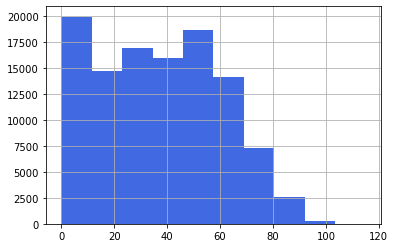

In [18]:
#plotting an histogram to visualize age distribution of the patients observed in the dataset

df.Age.hist(color = 'royalblue')
plt.grid(True)

> Based on the hsitogram below, the age distribution spead between 0 and a little above 100 years.

In [22]:
#checking for the number of patients that showed up and those that did not show.

status = df['No_show'].value_counts()
status

No     88207
Yes    22319
Name: No_show, dtype: int64

> 22,319 patients missed their appointment while 88, 207 patients attended their appointment.

Text(0, 0.5, 'Number of People')

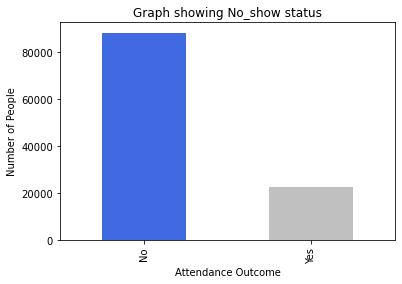

In [23]:
#Visualizing the attendance status using a bar chart

colors = ['royalblue', 'silver']
status.plot(kind = 'bar', title = 'Graph showing No_show status', color = colors)
plt.xlabel('Attendance Outcome')
plt.ylabel('Number of People')

In [24]:
#checking for statistics of male and female in the dataset

gender_count = df['Gender'].value_counts()
gender_count

F    71839
M    38687
Name: Gender, dtype: int64

> The dataset contain 71,839 female and 38, 687 male patients

Text(0, 0.5, 'Number of People')

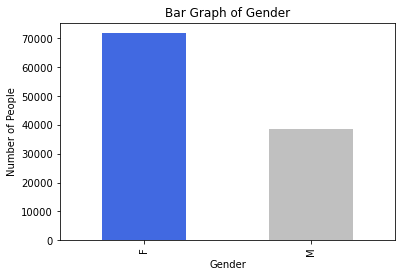

In [25]:
#Visualizing for the statistics of male and female patients observed in the dataset

colors = ['royalblue', 'silver']
gender_count.plot(kind = 'bar', title = 'Bar Graph of Gender', color = colors)
plt.xlabel('Gender')
plt.ylabel('Number of People')

> In order to check the proportion of the categories in each independent variables (featured columns) responsible attendance status, it is efficient to create a function which could be applied repeatedly throughout this investigation.
> The function aim would be to calculate proportion for the independent variables using the groupby and value_count dunctions and returning the proportions if all the inputed data is correct.

In [67]:
def func (df,category,feature):
    try:
        if df.empty == True:
            raise Exception('empty dataset')
        for value in category: 
            if value not in df:
                raise Exception('error')
        result = df.groupby(category)[feature].value_counts(normalize=True).unstack(feature)
        return result
    except Exception as error:
        print("incorrect entry " + repr(error))

 - df : dataframe containing patients who attended and those that did not attend their appointment.
 - category : this is the data that contains independent variables that we are using to group feature by (No_show status in this case).
 - feature : this is the string showing specific column name; independent variables (whose proportion to calculate).

In [68]:
#checking for statistics of patients who missed or attended their medical appointment based on their gender

s_ns_gender = func(df,['Gender'],'No_show')
s_ns_gender

No_show,No,Yes
Gender,,
F,0.796851,0.203149
M,0.800321,0.199679


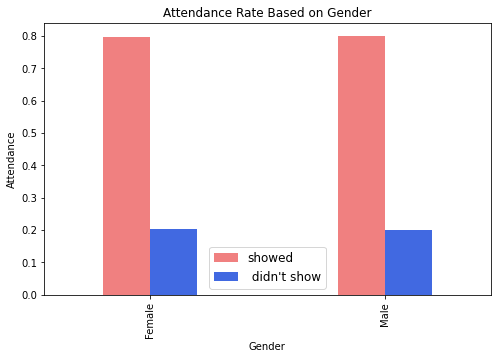

In [69]:
#set location for label and width of the bars
color = ['lightcoral','royalblue']
width = 0.40
labels = ['Female', 'Male']
length = np.arange(len(labels))

s_ns_gender.plot(kind = 'bar', width = width, color = color, figsize = (8,5))

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Attendance')
plt.xlabel('Gender')
plt.title('Attendance Rate Based on Gender')
plt.xticks(length, labels)
plt.legend(["showed"," didn't show"],fontsize=12)
labels = labels

plt.show()

## Answer 1
 > The attendance rate for both gender was high and not significantly different from each other, this suggests that there is not correlation between gender and the attendance rate.

### Does patient gender affects the attendance rate?
   - 80.03% of male showed up for their appointment
   - 79.69% of female showed up for their appointment

## Question 2
### Does patient SMS receipt status affects the attendance rate?

 - what is the proportion patients who received SMS and attended their appointment.
 - what is the proportion of patients who did not received SMS and attended their appointment.

In [70]:
#checking for statistics of patients who missed or attended their medical appointment based on SMS receipt status

s_ns_SMS = func(df,['SMS_received'],'No_show')
s_ns_SMS

No_show,No,Yes
SMS_received,,
0,0.832965,0.167035
1,0.724255,0.275745


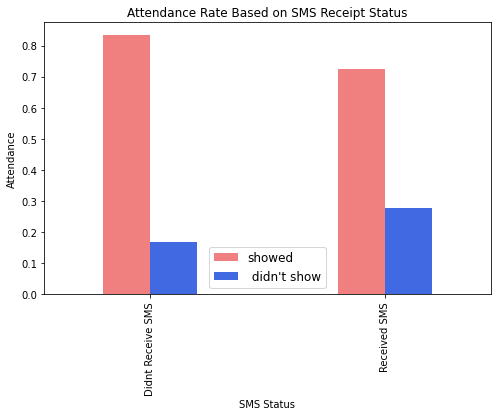

In [71]:
#set location for label and width of the bars
color = ['lightcoral','royalblue']
width = 0.40
labels = ['Didnt Receive SMS', 'Received SMS']
length = np.arange(len(labels))

s_ns_SMS.plot(kind = 'bar', width = width, color = color, figsize = (8,5))

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Attendance')
plt.xlabel('SMS Status')
plt.title('Attendance Rate Based on SMS Receipt Status')
plt.xticks(length, labels)
plt.legend(["showed"," didn't show"],fontsize=12)
labels = labels

plt.show()

## Answer 2
 > The attendance rate showed that a higher proportion of people that did not receive SMS showed for the medical appointment, even more that those that received SMS, this implies that SMS receipt status did not contribute significantly to patience attendance rate.
 
### Does patient SMS receipt status affects the attendance rate?
   - 83.29% of patients that did not receive SMS showed up for their appointment
   - 72.42% of patients that receive SMS showed up for their appointment

## Question 3
### Does patient Hypertension Status affects the attendance rate?

 - what is the proportion of patients who have hypertension and attended their appointment.
 - what is the proportion of patients who do not have hypertension and attended their appointment.

In [72]:
#checking for statistics of patients who missed or attended their medical appointment based on their hyptertension status

s_ns_hyp = func(df,['Hypertension'],'No_show')
s_ns_hyp

No_show,No,Yes
Hypertension,,
0,0.790961,0.209039
1,0.826980,0.173020


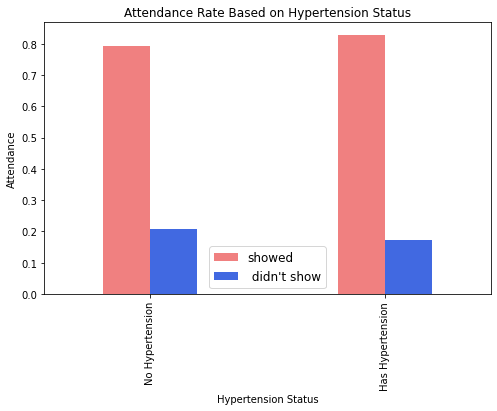

In [73]:
#set location for label and width of the bars
color = ['lightcoral','royalblue']
width = 0.40
labels = ['No Hypertension', 'Has Hypertension']
length = np.arange(len(labels))

s_ns_hyp.plot(kind = 'bar', width = width, color = color, figsize = (8,5))

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Attendance')
plt.xlabel('Hypertension Status')
plt.title('Attendance Rate Based on Hypertension Status')
plt.xticks(length, labels)
plt.legend(["showed"," didn't show"],fontsize=12)
labels = labels

plt.show()

## Answer 3
 > The graph above shows that a higher proportion of people that showed up for their appointment was high in cases where they had hypertension and in those that did not, this indicates that the patients hypertension status does not signifcantly affect the attendance rate.
 
### Does patient Hypertension Status affects the attendance rate?
   - 79.09% of patients that did not have hypertension showed up for their appointment
   - 82.69% of patients that have hypertension showed up for their appointment

## Question 4
### Does patient Diabetes Status affects the attendance rate?

 - what is the proportion of patients who have diabetes and attended their appointment.
 - what is the proportion of patients who do not have diabetes and attended their appointment.

In [74]:
s_ns_db = func(df,['Diabetes'],'No_show')
s_ns_db

No_show,No,Yes
Diabetes,,
0,0.796370,0.203630
1,0.819967,0.180033


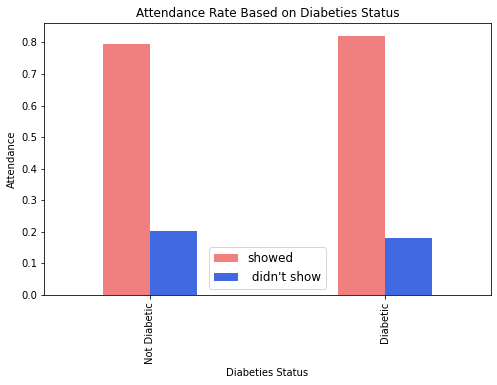

In [75]:
#set location for label and width of the bars
color = ['lightcoral','royalblue']
width = 0.40
labels = ['Not Diabetic', 'Diabetic']
length = np.arange(len(labels))

s_ns_db.plot(kind = 'bar', width = width, color = color, figsize = (8,5))

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Attendance')
plt.xlabel('Diabeties Status')
plt.title('Attendance Rate Based on Diabeties Status')
plt.xticks(length, labels)
plt.legend(["showed"," didn't show"],fontsize=12)
labels = labels

plt.show()

## Answer 4
 > Based on the graph above, the proportion of people that showed up for the appointment were high in both cases of diabeties and close to each other, this indicates that the patients diabeties status does not signifcantly affect the attendance rate.
 
### Does patient Diabetes status affects the attendance rate?
   - 79.63% of patients that did not have diabeties showed up for their appointment
   - 81.99% of patients that have diabeties showed up for their appointment

## Question 5
### Does patient Alcoholism status affects the attendance rate?

 - what is the proportion of patients who suffer alcoholism and attended their appointment.
 - what is the proportion of patients who do not suffer alcoholism and attended their appointment.

In [76]:
s_ns_alc = func(df,['Alcoholism'],'No_show')
s_ns_alc

No_show,No,Yes
Alcoholism,,
0,0.798052,0.201948
1,0.798512,0.201488


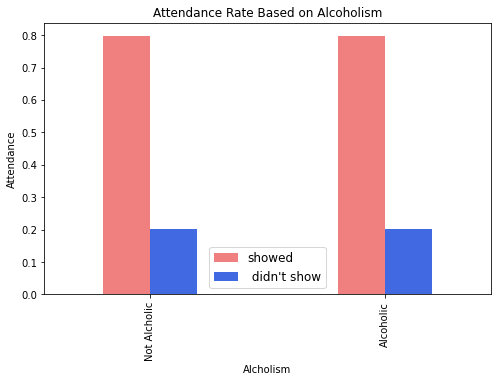

In [77]:
#set location for label and width of the bars
color = ['lightcoral','royalblue']
width = 0.40
labels = ['Not Alcholic', 'Alcoholic']
length = np.arange(len(labels))

s_ns_alc.plot(kind = 'bar', width = width, color = color, figsize = (8,5))

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Attendance')
plt.xlabel('Alcholism')
plt.title('Attendance Rate Based on Alcoholism')
plt.xticks(length, labels)
plt.legend(["showed"," didn't show"],fontsize=12)
labels = labels

plt.show()

## Answer 5
 > The atttendance rate for patients who suffer alcoholism and those who are not was very high and close in both cases suggesting that alcohol status is not a determinant of attendance rate of the patients.
 
### Does patient Alcoholism status affects the attendance rate?
   - 79.80% of patients that did not have diabeties showed up for their appointment
   - 79.85% of patients that have diabeties showed up for their appointment

## Question 6
### Does patient Handicap status affects the attendance rate?

 - what is the proportion of patients who are handicap and attended their appointment.
 - what is the proportion of patients who are not handicap and attended their appointment.

In [78]:
s_ns_hcap = func(df,['Handicap'],'No_show')
s_ns_hcap

No_show,No,Yes
Handicap,,
0,0.797645,0.202355
1,0.820764,0.179236
2,0.797814,0.202186
3,0.769231,0.230769
4,0.666667,0.333333


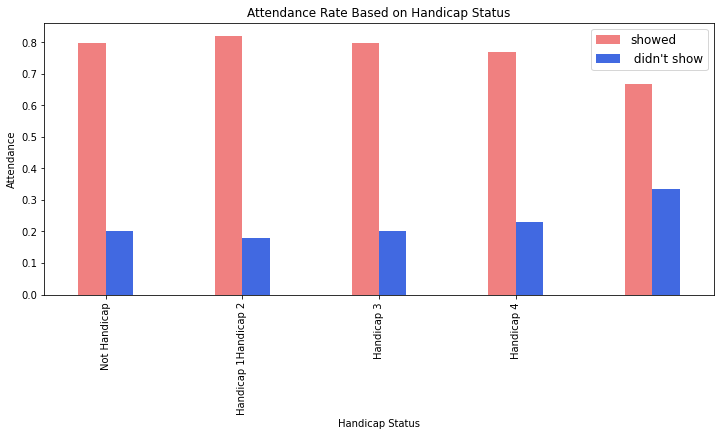

In [79]:
#set location for label and width of the bars
color = ['lightcoral','royalblue']
width = 0.40
labels = ['Not Handicap', 'Handicap 1' 'Handicap 2', 'Handicap 3', 'Handicap 4']
length = np.arange(len(labels))

s_ns_hcap.plot(kind = 'bar', width = width, color = color, figsize = (12,5))

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Attendance')
plt.xlabel('Handicap Status')
plt.title('Attendance Rate Based on Handicap Status')
plt.xticks(length, labels)
plt.legend(["showed"," didn't show"],fontsize=12)
labels = labels

plt.show()

## Answer 6
 > Based on the graph above, the proportion of people in Handicap 4 category that attended their appointment is significantly lower to those that were not handicap and in handicap catergory 1 to 3, however there is not enough difference in the proportions to suggest that there is a significant difference or correlation between handicap status or category and attendance rate. 
 
### Does patient Handicap status affects the attendance rate?
   - 79.76% of patients who are not handicap showed up for their appointment
   - 82.07% of patients who are in Handicap 1 category showed up for their appointment
   - 79.78% of patients who are in Handicap 2 category showed up for their appointment
   - 76.92% of patients who are in Handicap 3 category showed up for their appointment
   - 66.67% of patients who are in Handicap 4 category showed up for their appointment

## Question 7
### Does patient Scholarship Status affects the attendance rate?

 - what proportion of patients who have scholarship and attended their appointment.
 - what proportion of patients who do not have scholarship and attended their appointment.

In [80]:
s_ns_scl = func(df,['Scholarship'],'No_show')
s_ns_scl

No_show,No,Yes
Scholarship,,
0,0.801926,0.198074
1,0.762637,0.237363


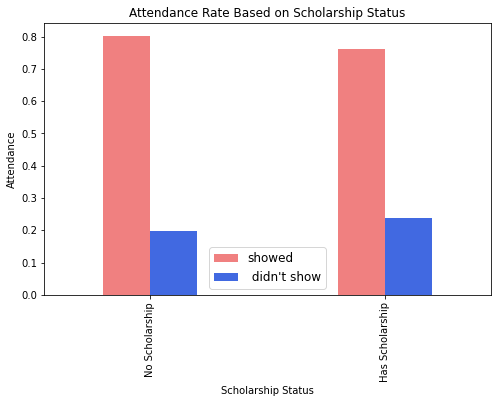

In [81]:
#set location for label and width of the bars
color = ['lightcoral','royalblue']
width = 0.40
labels = ['No Scholarship', 'Has Scholarship']
length = np.arange(len(labels))

s_ns_scl.plot(kind = 'bar', width = width, color = color, figsize = (8,5))

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Attendance')
plt.xlabel('Scholarship Status')
plt.title('Attendance Rate Based on Scholarship Status')
plt.xticks(length, labels)
plt.legend(["showed"," didn't show"],fontsize=12)
labels = labels

plt.show()

## Answer 7
> Based on the statistics above, there is no significant difference in the attendance status from the 2 scholarship categories, this suggest that scholarship status does not affect attendance rate.

### Does patient Scholarship Status affects the attendance rate?
   - 80.19% of patients that did not have Scholarship showed up for their appointment
   - 76.26% of patients that have Scholarship showed up for their appointment

<a id='conclusions'></a>
## Conclusions

> Based on the investigation conducted, most of the patients attended their medical appointment. The following are the summary conclusion deduced for each answer asked in the introduction.
 - Gender does not determine patients appointment rate.
 - SMS receipt status does not determine patients appointment rate, attendance rate of patients who did not receive SMS was also noticeably higher that that of those that received SMS.
 - Hypertension Status does not determine patients appointment rate.
 - Diabetes Status does not determine patients appointment rate.
 - Alcoholism does not determine patients appointment rate.
 - Handicap Status does not determine patients appointment rate.
 - Scholarship Status does not determine patients appointment rate.

## Limitations
 - The No_show status answer of yes and no took a while to get used to.
 - The 0 and 1 code for other variables was also confusing.
 - Age category could be easily analysed if the age was categorized the same way handicap status/stage was categorized.


In [52]:
from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset 1.ipynb']);